In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#récupération des données
nba=pd.read_csv("nba_2013.csv")

In [5]:
nba[nba.player=="Tony Parker"]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
344,Tony Parker,PG,31,SAS,68,68,1997,456,914,0.499,...,138,155,388,36,9,151,86,1134,2013-2014,2013


In [8]:
nba[nba.player=="Tony Parker"].iloc[0]

player          Tony Parker
pos                      PG
age                      31
bref_team_id            SAS
g                        68
gs                       68
mp                     1997
fg                      456
fga                     914
fg.                   0.499
x3p                      25
x3pa                     67
x3p.               0.373134
x2p                     431
x2pa                    847
x2p.               0.508855
efg.                  0.513
ft                      197
fta                     243
ft.                   0.811
orb                      17
drb                     138
trb                     155
ast                     388
stl                      36
blk                       9
tov                     151
pf                       86
pts                    1134
season            2013-2014
season_end             2013
Name: 344, dtype: object

In [9]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [10]:
#suppression des données manquantes
nba2=nba.dropna()

In [11]:
nba2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 480
Data columns (total 31 columns):
player          403 non-null object
pos             403 non-null object
age             403 non-null int64
bref_team_id    403 non-null object
g               403 non-null int64
gs              403 non-null int64
mp              403 non-null int64
fg              403 non-null int64
fga             403 non-null int64
fg.             403 non-null float64
x3p             403 non-null int64
x3pa            403 non-null int64
x3p.            403 non-null float64
x2p             403 non-null int64
x2pa            403 non-null int64
x2p.            403 non-null float64
efg.            403 non-null float64
ft              403 non-null int64
fta             403 non-null int64
ft.             403 non-null float64
orb             403 non-null int64
drb             403 non-null int64
trb             403 non-null int64
ast             403 non-null int64
stl             403 non-null int64
blk    

In [15]:
#création des indices permutés
permut=np.random.permutation(nba2.index)

In [21]:
#création des échantillons test / apprentissage
test=nba2.loc[permut[:round(len(permut)*0.3)]]
train =nba2.loc[permut[round(len(permut)*0.3):]]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [23]:
from sklearn.cross_validation import train_test_split

In [24]:
#création des échantillons test / apprentissage
train, test = train_test_split(nba2,test_size=0.3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
#création de l'objet kNN
knn=KNeighborsRegressor(n_neighbors=9)

In [29]:
train.columns
x_col=[u'g', u'gs', u'mp', u'fg',
       u'fga', u'fg.', u'x3p', u'x3pa', u'x3p.', u'x2p', u'x2pa', u'x2p.',
       u'efg.', u'ft', u'fta', u'ft.', u'orb', u'drb', u'trb', u'ast', u'stl',
       u'blk', u'tov', u'pf']

In [31]:
#ajustement du modèle
knn.fit(train[x_col],train['pts'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')

In [34]:
#prediction
prediction=knn.predict(test[x_col])

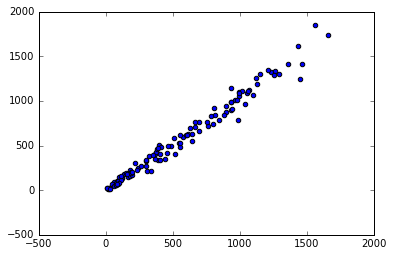

In [37]:
plt.scatter(prediction, test["pts"])